Gradient de la perte de Huber :
⎧-1.0⋅y + 1.0⋅yₕₐₜ  for δ ≥ │y - yₕₐₜ│
⎨                                     
⎩-δ⋅sign(y - yₕₐₜ)      otherwise     

Hessienne (seconde dérivée) :
⎧      1.0        for δ ≥ │y - yₕₐₜ│
⎨                                   
⎩2⋅δ⋅δ(y - yₕₐₜ)      otherwise     


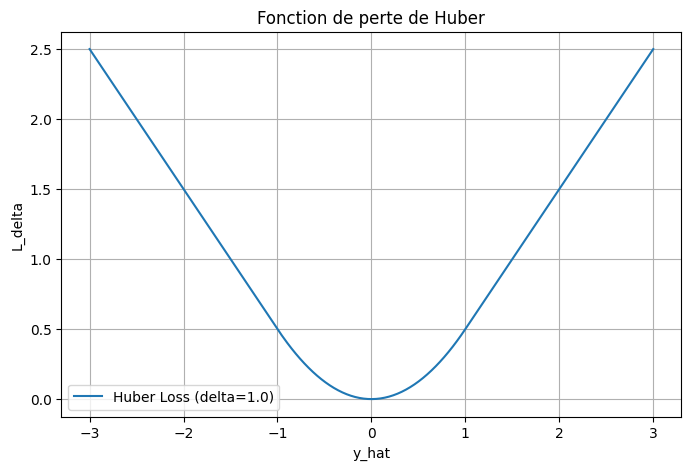

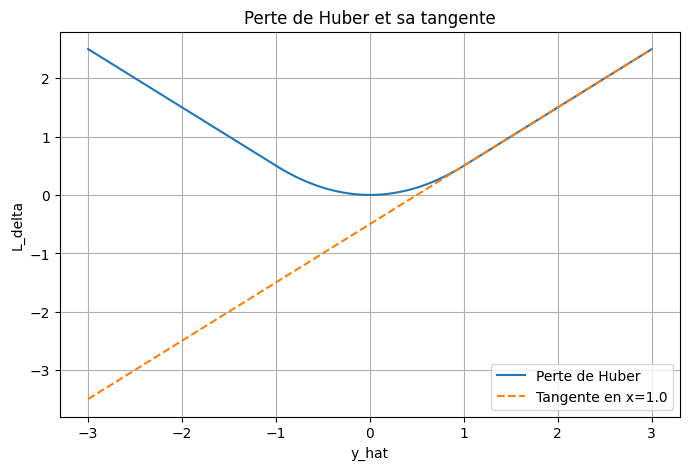

=== Régression - California Housing (100 premières obs.) ===
   MedInc  HouseAge
0  8.3252      41.0
1  8.3014      21.0
2  7.2574      52.0
3  5.6431      52.0
4  3.8462      52.0
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

=== Classification - Iris (100 premières obs.) ===
   petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [5]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Variables symboliques
y, y_hat, delta = sp.symbols('y y_hat delta', real=True)
e = y - y_hat

# Définition de la perte de Huber
L_huber = sp.Piecewise(
    (0.5*e**2, sp.Abs(e) <= delta),
    (delta*(sp.Abs(e) - delta/2), sp.Abs(e) > delta)
)

# Gradient
grad_L = sp.diff(L_huber, y_hat)
print("Gradient de la perte de Huber :")
sp.pprint(grad_L)

# Hessienne (seconde dérivée)
hess_L = sp.diff(grad_L, y_hat)
print("\nHessienne (seconde dérivée) :")
sp.pprint(hess_L)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing, load_iris

# -----------------------------
# Fonction perte de Huber
# -----------------------------
delta_val = 1.0
y_val = 0.0
y_hat_vals = np.linspace(-3, 3, 400)

def huber_numeric(y_hat, y, delta):
    e = y - y_hat
    return np.where(np.abs(e) <= delta, 0.5*e**2, delta*(np.abs(e) - delta/2))

L_vals = huber_numeric(y_hat_vals, y_val, delta_val)

# -----------------------------
# Représentation graphique Huber
# -----------------------------
plt.figure(figsize=(8,5))
plt.plot(y_hat_vals, L_vals, label=f'Perte de Huber (delta={delta_val})')
plt.xlabel('y_hat')
plt.ylabel('L_delta')
plt.title('Fonction de perte de Huber')
plt.grid(True)
plt.legend()
plt.show()

# -----------------------------
# Tangente à un point donné
# -----------------------------
x0 = 1.0
L0 = huber_numeric(x0, y_val, delta_val)
grad0 = -np.clip(y_val - x0, -delta_val, delta_val)  # Gradient numérique
x_vals = np.linspace(-3, 3, 400)
tangent_vals = L0 + grad0*(x_vals - x0)

plt.figure(figsize=(8,5))
plt.plot(y_hat_vals, L_vals, label='Perte de Huber')
plt.plot(x_vals, tangent_vals, '--', label=f'Tangente en x={x0}')
plt.xlabel('y_hat')
plt.ylabel('L_delta')
plt.title('Perte de Huber et sa tangente')
plt.grid(True)
plt.legend()
plt.show()

# -----------------------------
# Régression : California Housing
# -----------------------------
data_reg = fetch_california_housing(as_frame=True)
X_reg = data_reg.data.loc[0:99, ['MedInc', 'HouseAge']]
y_reg = data_reg.target.loc[0:99]

print("=== Régression - California Housing (100 premières obs.) ===")
print(X_reg.head())
print(y_reg.head())

# -----------------------------
# Classification : Iris
# -----------------------------
data_cls = load_iris(as_frame=True)
df = data_cls.frame
X_clf = df.loc[0:100, ['petal length (cm)', 'petal width (cm)']]
y_clf = df.loc[0:100, 'target']

print("\n=== Classification - Iris (100 premières obs.) ===")
print(X_clf.head())
print(y_clf.head())



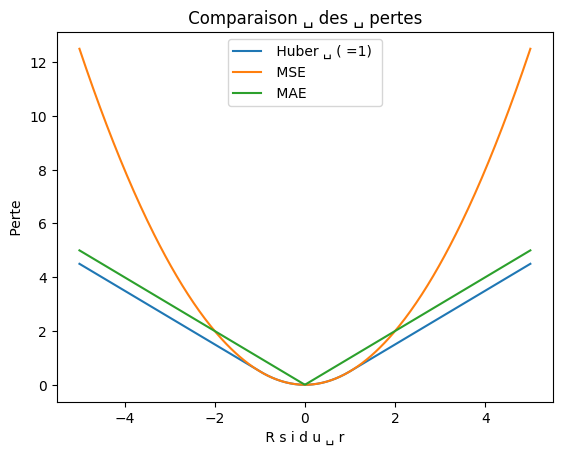

In [4]:
import numpy as np
import matplotlib . pyplot as plt
def huber (r , delta =1.0) :
  return np . where ( np . abs ( r ) <= delta , 0.5* r **2 , delta *( np . abs ( r ) -0.5* delta ) )
r = np . linspace ( -5 , 5 , 400)
plt . plot (r , huber (r , delta =1) , label = " Huber ␣ ( =1) " )
plt . plot (r , 0.5* r **2 , label = " MSE " )
plt . plot (r , np . abs ( r ) , label = " MAE " )
plt . legend ()
plt . title ( " Comparaison ␣ des ␣ pertes " )
plt . xlabel ( " R s i d u ␣ r " )
plt . ylabel ( " Perte " )
plt . show ()